#Grupo 25 - Entregable Aprendizaje Supervisado

#Parte 1 de 3

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico

Importamos las librerias necesarias para realizar el análisis exploratorio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

### Importar datos

Aqui importamos el conjunto de datos tanto de entrenamiento como de test.

In [ ]:
url_test = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv'
url_train = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv'
df_train = pd.read_csv(url_train, sep = ',')
df_test = pd.read_csv(url_test, sep = ',')

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


In [ ]:
print("TRAIN")
print(f"SHAPE {df_train.shape}")

print("TEST")
print(f"SHAPE {df_test.shape}")

TRAIN
SHAPE (7823, 14)
TEST
SHAPE (870, 13)


In [ ]:
print("TRAIN")
print(f"COLS. {df_train.columns}")

print("TEST")
print(f"COLS. {df_test.columns}")

TRAIN
COLS. Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
TEST
COLS. Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


**Descripción de las columnas**

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

#### test.csv - Personal records for the remaining one-third of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
#### sample_submission.csv - A submission file in the correct format.
- PassengerId - Id for each passenger in the test set.
- Transported - The target. For each passenger, predict either True or False.

In [ ]:
df = df_train.copy()
df.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5831,7309,NaN,False,G/1264/S,TRAPPIST-1e,23.0,False,535.0,3.0,17.0,0.0,214.0,Cinda Mcdowns,0
2137,1844,Europa,True,A/24/S,55 Cancri e,39.0,False,0.0,0.0,0.0,0.0,0.0,Gomeron Clindy,1
149,1677,Earth,True,G/279/S,PSO J318.5-22,15.0,False,0.0,0.0,0.0,0.0,0.0,Stanya Adkinson,0
5615,6139,Europa,False,D/196/S,55 Cancri e,17.0,False,0.0,311.0,6.0,4236.0,557.0,Ranan Witeronfus,0
3914,3179,Europa,True,C/113/P,55 Cancri e,53.0,False,0.0,0.0,0.0,0.0,0.0,Betenif Cumpting,1
1900,886,Earth,True,G/144/S,PSO J318.5-22,38.0,False,0.0,0.0,0.0,0.0,0.0,Done Lunapperts,1
7077,4815,Earth,False,F/1046/P,TRAPPIST-1e,35.0,False,0.0,116.0,51.0,0.0,701.0,Lawren Josey,0
2955,7668,Earth,False,G/1319/S,55 Cancri e,4.0,False,0.0,0.0,0.0,0.0,0.0,Leneva Jenkinnedy,1
1185,1389,Europa,False,B/62/S,TRAPPIST-1e,26.0,False,0.0,533.0,2119.0,10.0,504.0,Rasaleh Wassird,1
4812,4062,Europa,False,C/156/S,TRAPPIST-1e,41.0,False,0.0,545.0,0.0,2740.0,293.0,Halsham Aroodint,1


In [ ]:
df.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [ ]:
df.describe(exclude = np.number)

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,7644,7627,7639,7663,7639,7639
unique,3,2,6009,3,2,7623
top,Earth,False,G/734/S,TRAPPIST-1e,False,Ankalik Nateansive
freq,4114,4871,8,5316,7456,2


## Exploración y análisis de datos

 Resumen: 

 Análisis univariado:

 - Distribuciones
 - Ingeniería de características
 - Datos extremos  
 - Datos nulos o faltantes 

Análisis bivariado:

 - Correlaciones


###Distribuciones

In [ ]:
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', ]
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']

In [ ]:
df[numeric_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,57.0,0.0,3859.0,13.0,195.0,3874.0
1,18.0,0.0,0.0,0.0,0.0,0.0
2,33.0,0.0,0.0,0.0,0.0,0.0
3,43.0,142.0,1208.0,0.0,0.0,204.0
4,19.0,0.0,0.0,670.0,1.0,34.0
...,...,...,...,...,...,...
7818,12.0,0.0,0.0,0.0,0.0,0.0
7819,44.0,0.0,0.0,744.0,62.0,3.0
7820,55.0,0.0,0.0,0.0,0.0,0.0
7821,15.0,0.0,840.0,123.0,0.0,20.0


Exploramos las distribuciones de probabilidades de las variables numéricas.


 Age


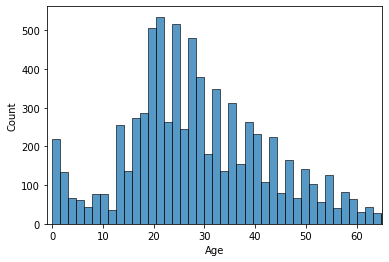


 RoomService


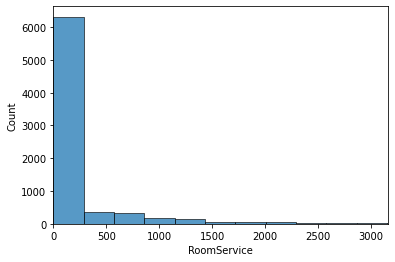


 FoodCourt


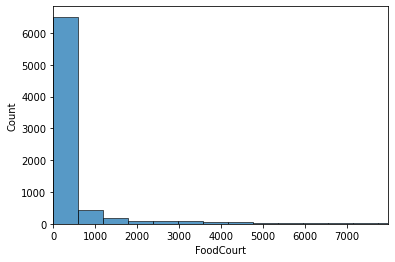


 ShoppingMall


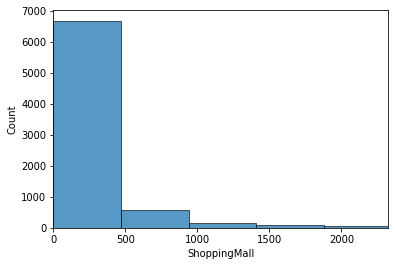


 Spa


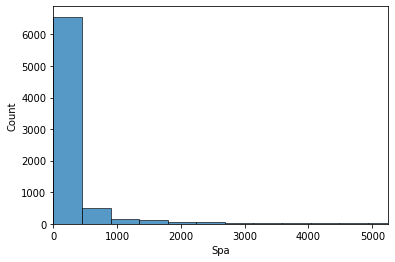


 VRDeck


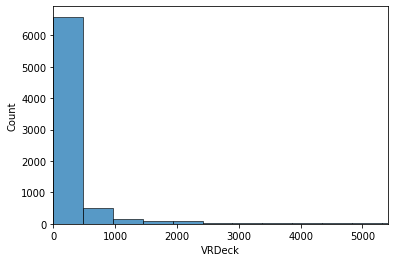

In [ ]:
for c in numeric_cols:
  print("\n", c)
  sns.histplot(df[c], bins = 50)
  plt.xlim(df[c].min()-1, np.nanquantile(df[c],0.99))
  plt.show()

Exploramos las distribuciones de probabilidades de las variables categóricas.


 HomePlanet


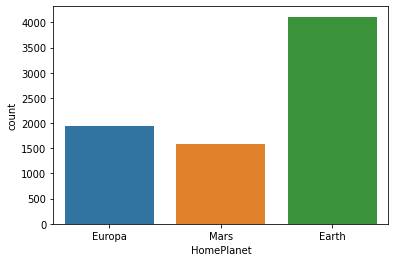


 CryoSleep


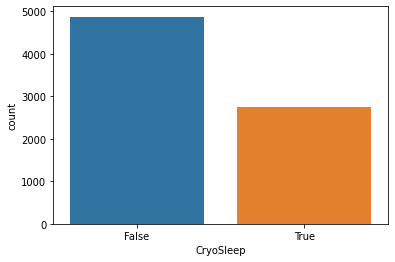


 Cabin


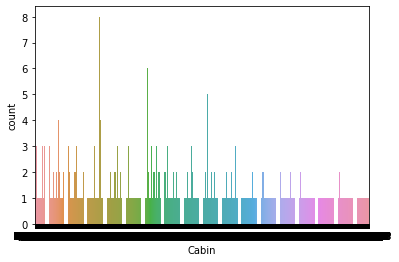


 Destination


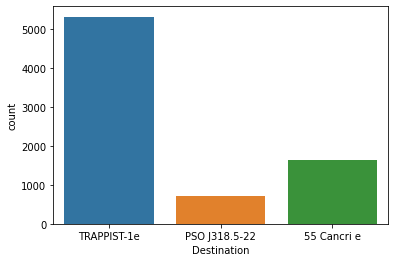


 VIP


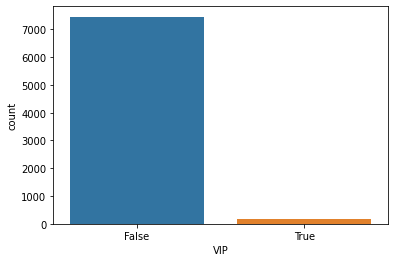


 Name


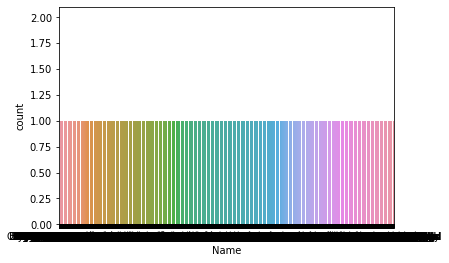


 Transported


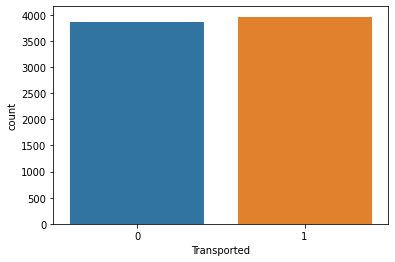

In [ ]:
for c in categorical_cols:
  print("\n", c)
  sns.countplot(x = df[c])
  plt.show()

### Ingeniería de caracteristicas

De la variable **Cabin**, que esta compuesta por deck/num/side, vamos a generar tres nuevas variables: **deck**, **num** y **side**.

A la variable **name** la separamos en **Firstname** y **Lastname**. 

Generamos una nueva variable denominada **Totalammenities**, a partir de la suma de **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa** y **VRDeck**.

Por último, generamos una nueva variable llamada **Cabin_qty**, que corresponde a la cantidad de pasajeros por cabina.


#### Cabin

In [ ]:
df = df.merge(df.Cabin.str.split('/', expand = True).rename(columns = dict(zip([0,1,2],["Deck", "Num", "Side"]))), 
         left_index=True, right_index=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


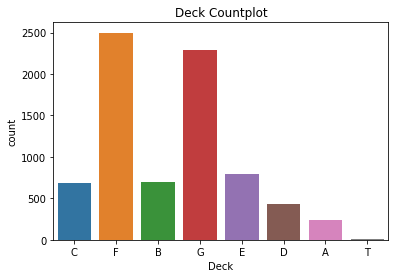

In [ ]:
plt.title("Deck Countplot")
sns.countplot(df.Deck)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


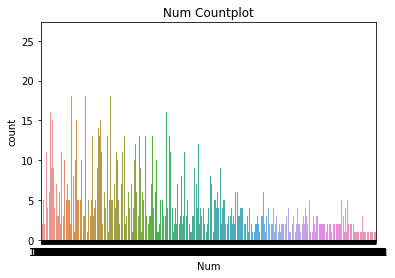

In [ ]:
plt.title("Num Countplot")
sns.countplot(df["Num"])
plt.show()

In [ ]:
df["Cabin"].nunique()

6009

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


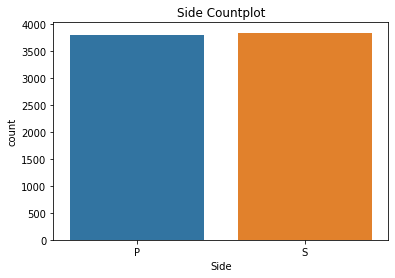

In [ ]:
plt.title("Side Countplot")
sns.countplot(df["Side"])
plt.show()

#### Name

In [ ]:
df = df.merge(df["Name"].str.split(" ", expand = True).rename(columns = dict(zip([0,1], ["Firstname", "Lastname"]))), 
         left_index=True, right_index=True)

In [ ]:
df.Firstname.value_counts()

Idace     12
Gwendy    11
Loree     10
Leneva    10
Breney    10
          ..
Astab      1
Mounch     1
Tig        1
Alles      1
Panzel     1
Name: Firstname, Length: 2642, dtype: int64

In [ ]:
df.Lastname.value_counts()

Casonston     17
Litthews      15
Oneiles       14
Domington     14
Browlerson    13
              ..
Hallahaney     1
Prucerod       1
Vlake          1
Ofracculy      1
Bush           1
Name: Lastname, Length: 2181, dtype: int64

#### Total Ammenities

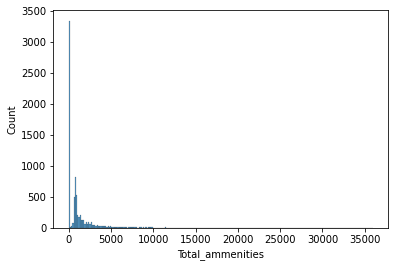

In [ ]:
ammenities_columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df["Total_ammenities"] = df[ammenities_columns].sum(axis = 1)
sns.histplot(df["Total_ammenities"])

#### Cabin qty

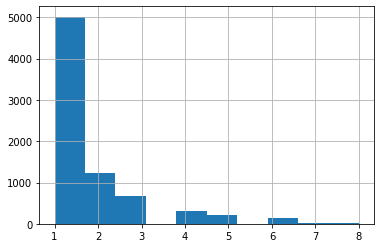

In [ ]:
cabin_groups = df.Cabin.value_counts()
df["Cabin_qty"] = df[df.Cabin.notnull()].Cabin.apply(lambda c: cabin_groups.loc[c])
df["Cabin_qty"].hist()

### Valores extremos



In [ ]:
def rango_intercuartil(array):
  q25,q75 = np.quantile(array, [0.25, 0.75])
  median = np.median(array)
  r_iq = q75 - q25
  min, max = (median - 1.5* r_iq, median + 1.5 * r_iq) 
  return min,max

In [ ]:
rango_intercuartil(rango_intercuartil(df["Age"].values))

(nan, nan)

Total registros Dataset:  7823 

Outliers de acuerdo al criterio de Rango Intercuartil


RoomService     1716
FoodCourt       1699
VRDeck          1672
ShoppingMall    1662
Spa             1644
Age               42
dtype: int64

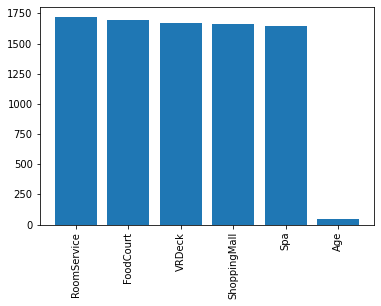

In [ ]:
outliers = []

print(f'Total registros Dataset:  {df.shape[0]} \n')

for col in numeric_cols:
  min, max = rango_intercuartil(rango_intercuartil(df[col].dropna().values))
  f = lambda x: (True if (x < min) | (x > max) else False)
  outlier_col = df[col].apply(f).sum()
  outliers.append(outlier_col)

print("Outliers de acuerdo al criterio de Rango Intercuartil")
outliers = pd.Series(outliers, index = numeric_cols).sort_values(ascending = False)
display(outliers)
plt.bar(outliers.index, outliers.values)
plt.xticks(rotation = 90)
plt.show()

Si bien con este criterio se observan muchos outliers, la mayoria de las variables no muestran distribuciones de forma normal. 

### Datos nulos o faltantes

In [ ]:
print("NULL VALUES")
df.isnull().sum().sort_values(ascending = False)

NULL VALUES


CryoSleep           196
ShoppingMall        188
Cabin_qty           184
Num                 184
Cabin               184
VIP                 184
Lastname            184
Firstname           184
Name                184
Side                184
Deck                184
HomePlanet          179
VRDeck              169
Age                 162
Destination         160
Spa                 158
FoodCourt           155
RoomService         154
Transported           0
Total_ammenities      0
PassengerId           0
dtype: int64

In [ ]:
print("NULL VALUES %")
df.isnull().sum().sort_values(ascending = False) / df.shape[0]

NULL VALUES %


CryoSleep           0.025054
ShoppingMall        0.024032
Cabin_qty           0.023520
Num                 0.023520
Cabin               0.023520
VIP                 0.023520
Lastname            0.023520
Firstname           0.023520
Name                0.023520
Side                0.023520
Deck                0.023520
HomePlanet          0.022881
VRDeck              0.021603
Age                 0.020708
Destination         0.020453
Spa                 0.020197
FoodCourt           0.019813
RoomService         0.019686
Transported         0.000000
Total_ammenities    0.000000
PassengerId         0.000000
dtype: float64

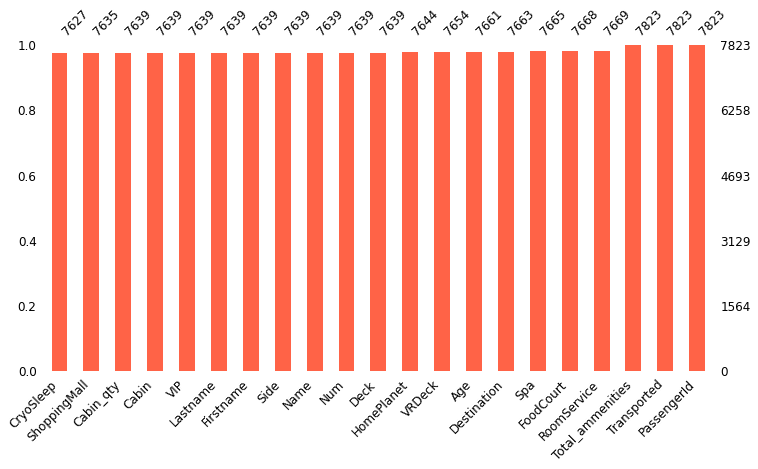

In [ ]:
msno.bar(df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato') 

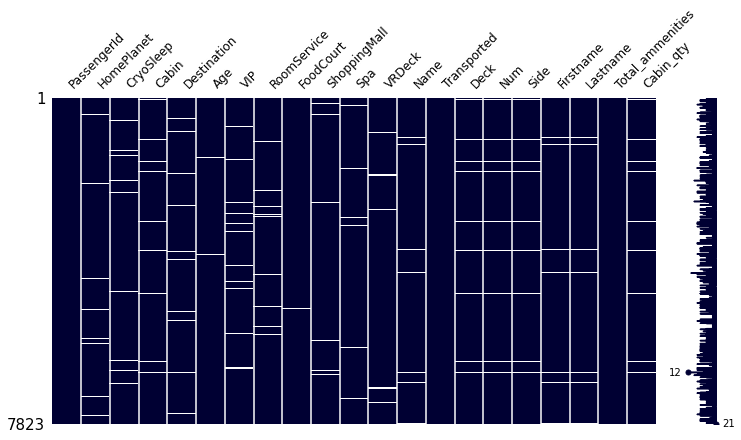

In [ ]:
msno.matrix(df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

Vemos que la variable con mayor cantidad de datos faltantes tienen un 2,5% de los mismos. Además vemos que los datos faltantes no se muestran correlacionados entre si, salvo en una sola entrada.  

### Correlaciones

Estudiamos la relación entre: 

-  Planeta de origen, total ammenities y si el pasajero fue transportado (target).
-  Lugar de destino y el target.
-  VIP y el target. 
-  Deck y el target. 
-  Side y el target.
-  Matriz de correlaciones.  

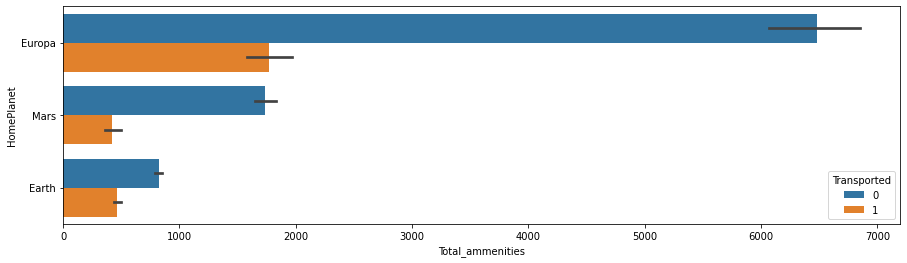

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(x="Total_ammenities", y="HomePlanet", hue="Transported",data=df, dodge=True)#alpha=.25,
plt.show()

In [ ]:
Planet = pd.crosstab(df['Transported'], df['HomePlanet'])
Dest = pd.crosstab(df['Transported'], df['Destination'])

Planet


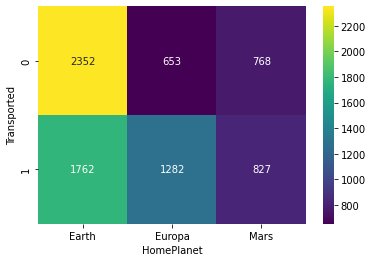

In [ ]:
print("Planet")
sns.heatmap(Planet, cmap="viridis", annot=True, fmt="d")
plt.show()

Destination


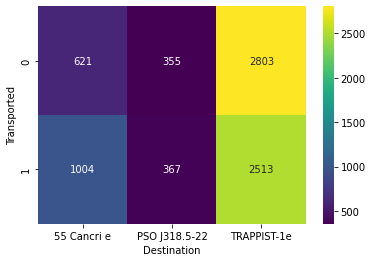

In [ ]:
print("Destination")
sns.heatmap(Dest, cmap="viridis", annot=True, fmt="d")
plt.show()

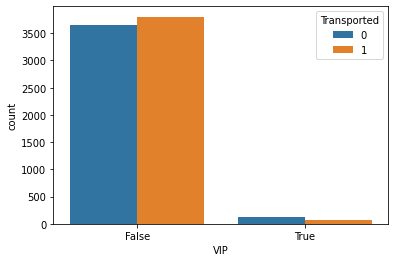

In [ ]:
sns.countplot(x = "VIP", hue = "Transported", data = df)

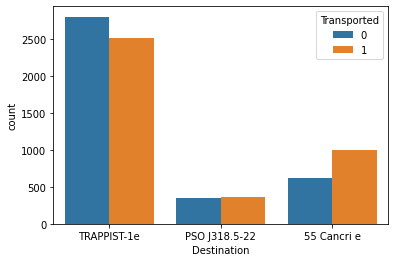

In [ ]:
sns.countplot(x = "Destination", hue = "Transported", data = df)

Deck


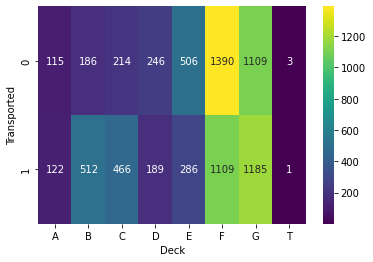

In [ ]:
Deck = pd.crosstab(df['Transported'], df['Deck'])
print("Deck")
sns.heatmap(Deck, cmap="viridis", annot=True, fmt="d")
plt.show()

Side


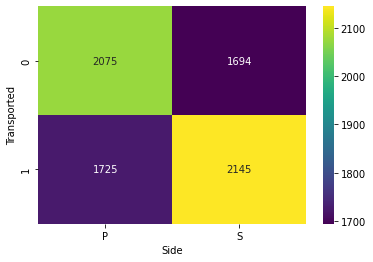

In [ ]:
Side = pd.crosstab(df['Transported'], df['Side'])
print("Side")
sns.heatmap(Side, cmap="viridis", annot=True, fmt="d")
plt.show()

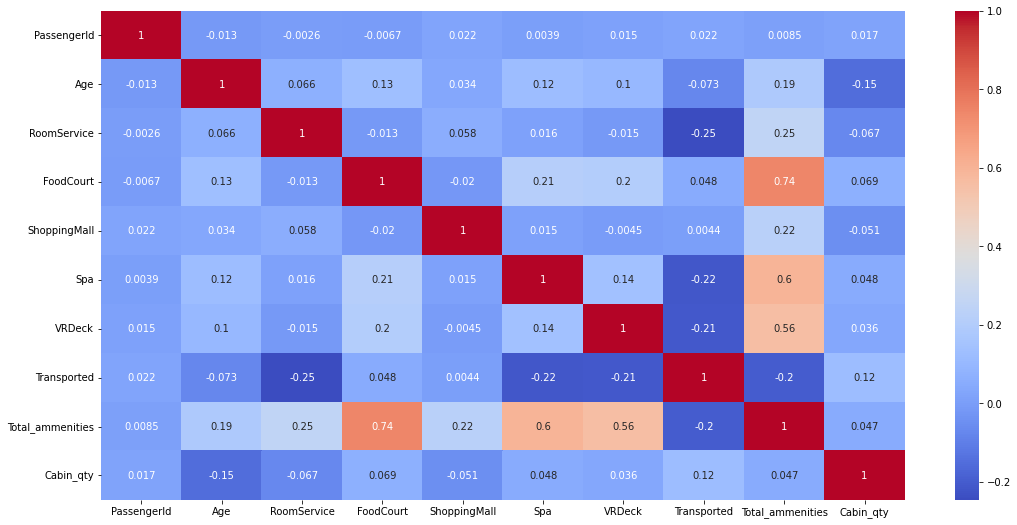

In [ ]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

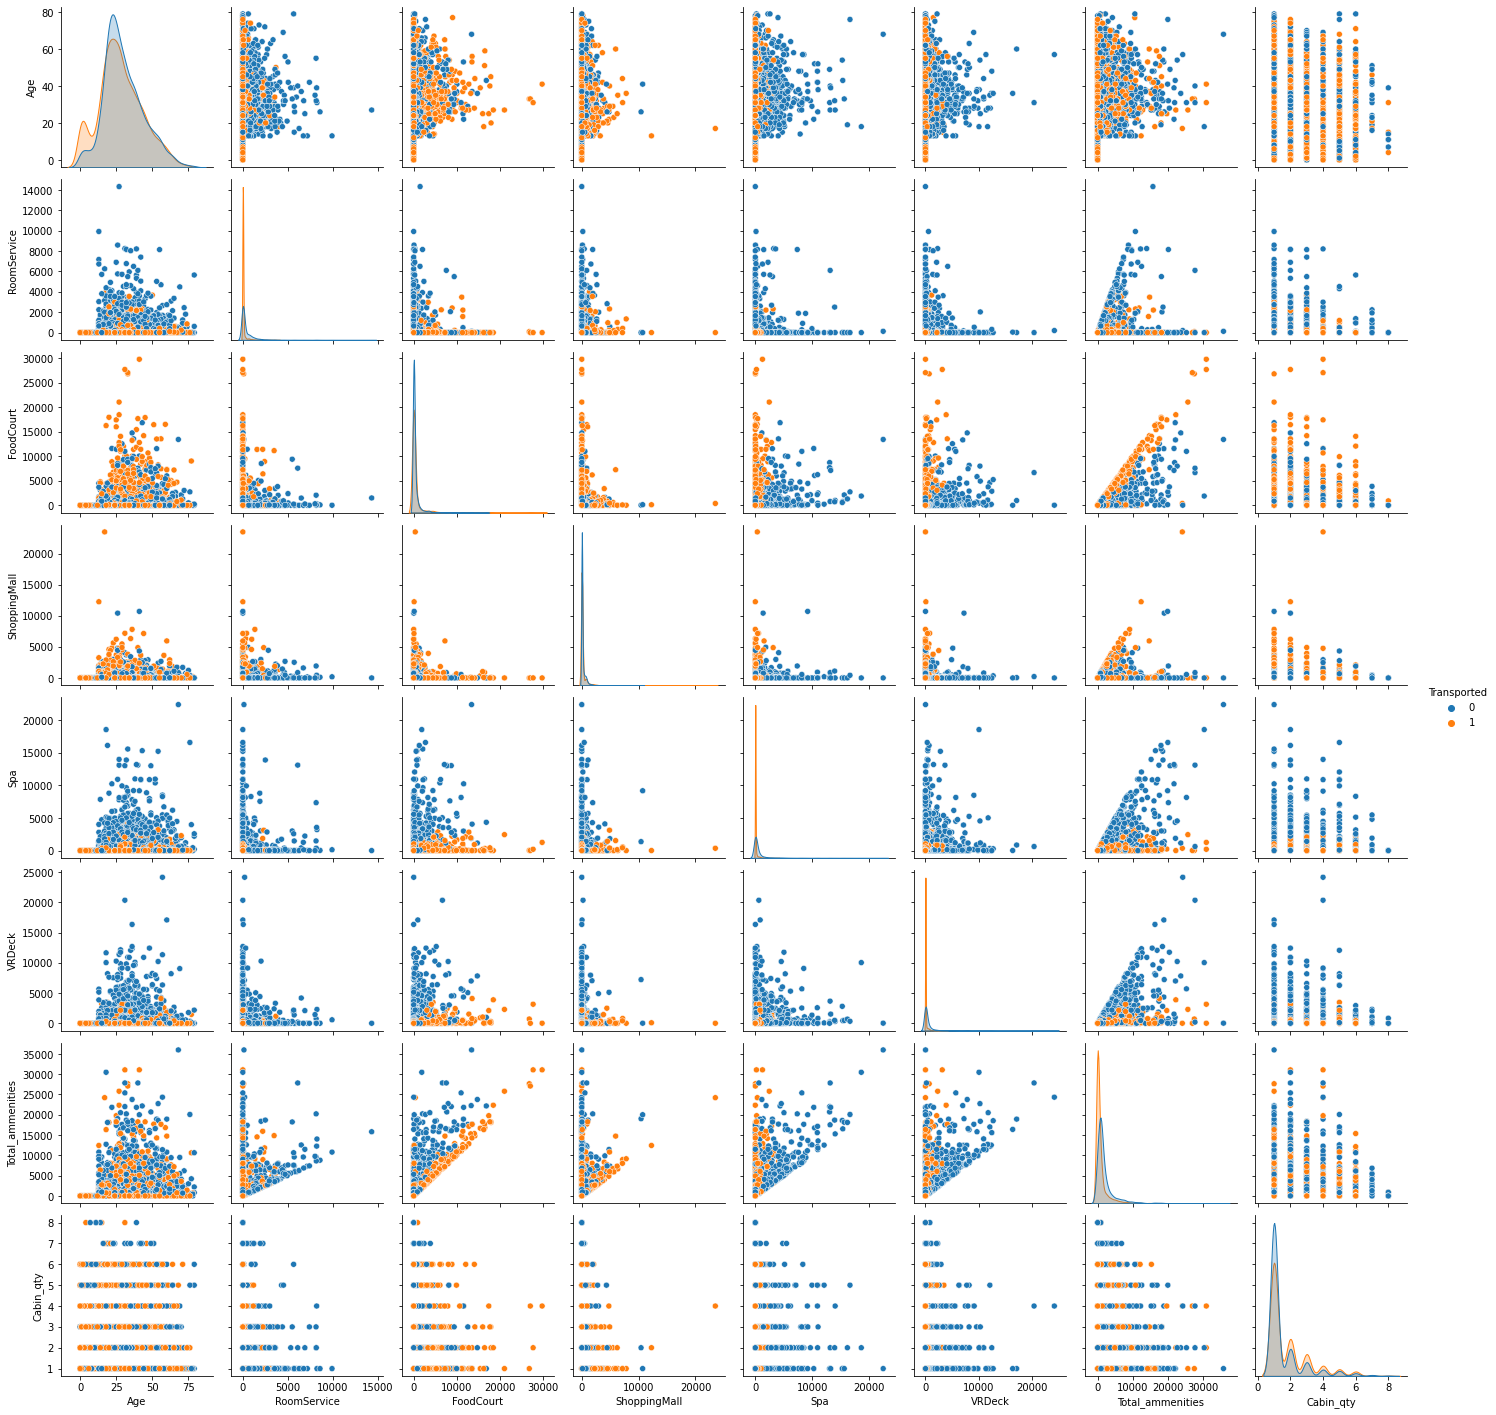

In [ ]:
sns.pairplot(data = df[numeric_cols + ["Transported", "Total_ammenities", "Cabin_qty"]], hue = "Transported")

Del análisis de las variables numéricas, observamos que las variables que mas correlación muestran con el target son: Room Service, Spa, VR Deck y en consecuencia Total ammenities, todas ellas con correlación negativa. En menor medida observamos que hay una correlación, positiva, entre la variable Cabin_qty y el target. 

### Exploración de la libreria pandas profiling

Observamos que con esta libreria obtenemos una descripción de cada una de las variables, si sus categorias estan balanceadas y sus distribuciones.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 21.9 MB 139 kB/s
     |████████████████████████████████| 596 kB 5.1 MB/s 
     |████████████████████████████████| 102 kB 73.7 MB/s 
     |████████████████████████████████| 690 kB 46.4 MB/s 
     |████████████████████████████████| 4.7 MB 45.9 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 58.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=6cd3e03c02c5fc5a8115ae4e2b42c5e43b678e514a957b3f63ee533cb4953fd6
  Stored in directory: /tmp/pip-ephem-wheel-cache-8b3v_567/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b593fcc2fdc9940c9357a559c8e9dbe249ac753d680a6c3a0fddf588141ab03c
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]